<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/OCT27-28/DESIDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

In [11]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA





In [13]:
#The spectra files we will be using had been preprocessed so that they only include quasars with redshift above 2.1
#For more publicily available spectra of all different targets that DESI observe consult https://data.desi.lbl.gov/doc/
#Lets read open one spectra file.
spec_file=fits.open("/content/coadd-sv3-dark-9930.fits")

#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI



Filename: /content/coadd-sv3-dark-9930.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   11R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   1434R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 11)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 11)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 11)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 11)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  9  R_FLUX

In [14]:
fibermap=Table(spec_file["FIBERMAP"].data)
fibermap


TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39633158248860187,0,234.7704149873764,44.39108161949448,-1.1088411,-1.947482,2015.5,4611686018427393606,1,TGT,0.2935470200951962,63,9011,2346p445,562939,2587,PSF,0.017097494,7.3669534,8.466139,10.715407,11.298954,17.484056,196.56413,122.45445,135.76204,5.573048,1.4807794,5.7292438,6.5840755,8.333321,5.7292438,6.5840755,8.333321,0,0.0,0.0,0.0,0.0,1397526111227879040,G2,20.454554,20.663158,19.905909,-0.2956178,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.7704149873764,44.39108161949448,4,3720.437,4,4,0.00975,0.012379418,-0.008,0.01155422,234.77046836479772,0.21082917,44.3911142986861,0.11946119,0.789
39633162560603324,0,234.8450667227985,44.76387887023483,0.0,0.0,2015.5,4611686018427393606,1,TGT,0.6095534925017012,63,9011,2349p447,563967,1212,PSF,0.014939815,2.5253031,3.1998527,4.366032,7.7781205,10.086306,558.0038,188.70312,77.29164,5.9529705,1.5987699,1.9631622,2.4875548,3.3941388,1.9631622,2.4875548,3.3941388,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.8450667227985,44.76387887023483,2,1522.4106,2,2,0.0005,0.0025495098,-0.0075,0.011335784,234.8450703012312,0.07426518,44.763907420731066,0.11754271,0.789
39633158248858158,0,234.57074180054917,44.557763733896444,0.0,0.0,2015.5,4674,1,TGT,0.8748142543070724,1,9011,2346p445,562939,558,PSF,0.019440606,0.3863989,0.4428361,0.87726057,1.7296386,0.53936297,712.6825,273.1222,90.99081,6.6912427,1.8003536,0.30037448,0.34424698,0.68195504,0.30037448,0.34424698,0.68195504,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103100,9,4674,0,0,0,0,0,0,234.57074180054917,44.557763733896444,2,1776.131,2,2,0.0025,0.002915476,-0.012,0.013,234.57075649434745,0.04285556,44.55781028213255,0.07084771,0.789
39633162564798529,0,235.2574047796485,44.839677070602164,0.0,0.0,2015.5,1028,1,TGT,0.4305605003011923,1,9011,2352p447,563968,2113,PSF,0.017009692,1.8590575,1.7628545,1.6930434,4.2262173,3.304231,455.55722,193.31769,90.13082,6.5004253,1.7512256,1.4452658,1.3704756,1.3162031,1.4452658,1.3704756,1.3162031,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,4,1028,0,0,0,0,0,0,235.2574047796485,44.839677070602164,2,2334.3809,2,2,0.0065,0.0065192026,-0.0135,0.014983324,235.25744207700563,0.017352914,44.83972898375434,0.088835,0.789
39633166855570067,0,235.0111848862819,44.90084018249816,0.0,0.0,2015.5,5702,1,TGT,0.39661401241819594,1,9011,2351p450,564991,659,PSF,0.013088547,0.7714703,0.6705034,1.3080568,3.0750005,5.084676,424.76572,146.44208,91.721725,6.548802,1.7081472,0.6006053,0.5220005,1.0183488,0.6006053,0.5220005,1.0183488,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,5702,0,0,0,0,0,0,235.0111848862819,44.90084018249816,4,4270.6904,4,4,0.0075,0.010173495,-0.

In [15]:

#As can be seen in the table, we have spectra of 49 quasars.

#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]
tids


39633158248860187
39633162560603324
39633158248858158
39633162564798529
39633166855570067
39633162556411118
39633162556410465
39633158248859282
39633158248857947
39633158248859374
39633166859764243


In [16]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data
bwave,bflux


(array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ]),
 array([[ 3.8817408 ,  9.0065155 ,  2.6238852 , ..., -0.62214106,
          0.72701645,  1.4562892 ],
        [ 6.2224064 , -1.5910938 ,  5.6179113 , ..., -0.18746097,
         -0.75983196,  5.010731  ],
        [ 3.3510168 ,  0.56624246,  1.3107128 , ..., -2.931951  ,
         -0.9156755 ,  4.2895083 ],
        ...,
        [ 9.921129  ,  5.530805  ,  3.216664  , ...,  0.2795569 ,
          0.3205994 ,  0.41233367],
        [-2.311409  , -3.120808  , -4.052487  , ..., -0.52411616,
         -1.1830047 ,  1.6353303 ],
        [ 2.9237106 ,  2.402708  , -7.504902  , ...,  1.331048  ,
          0.05264875, -0.2725638 ]], dtype=float32))

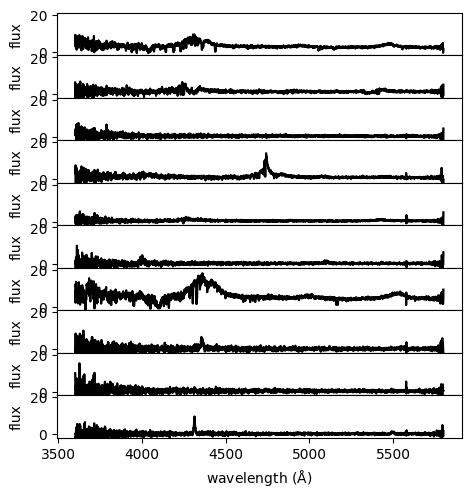

In [17]:
# AQUI APLIQUE DIRECTAMENTE LAS FUNCIONES PRECARGADAS COMO PRUEBA
pca = PCA(n_components=10)
pca.fit(bflux)

#GUARDEN LOS COMPONENTES PRINCIPALES
spec_mean = pca.mean_
evecs = pca.components_

fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i in range(10):
    ax = fig.add_subplot(10, 1, i+1)
    ax.plot(bwave, bflux[i], '-', c='gray')
    ax.plot(bwave, (spec_mean + np.dot(pca.transform(bflux[i:i+1]), evecs)).flatten(), '-k')
#EN ESTA PARTE AGREGUE EL FLATTEN PARA FORZARLO A QUE COMPILE
#NO COMPRENDI COMO CORREGIR LA DESIGUALDAD DE DIMENSIONES QUE ME MENCIONABA EL ERROR
    if i < 9:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

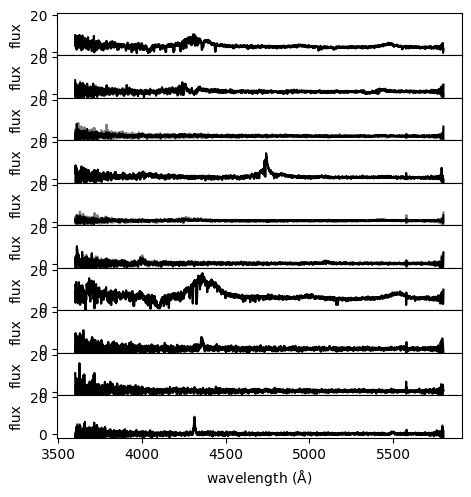

In [22]:

#AQUI CENTRAR EL ESPECTRO DEL FLUJO
spec_mean = np.mean(bflux, axis=0)
bflux_centered = bflux - spec_mean
#Aquí se está centrando el espectro de flujo. Esto significa
#que se está restando la media del espectro de flujo (spec_mean) a
#cada valor del espectro de flujo (bflux)

#Calcular matriz de covarianza
cov_matrix = np.cov(bflux_centered.T)

#Calculo de eigen valores
#Aquí se están calculando los valores propios (evals)
#y los vectores propios (evecs) de la matriz de covarianza.
evals, evecs = np.linalg.eig(cov_matrix)

#Aquí se están ordenando los valores propios en orden descendente,
#y luego se reordenan los vectores propios para que coincidan con el nuevo orden de los valores propios.
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

#https://bing.com/search?q=ordenamiento+de+valores+propios+y+vectores+propios+en+an%c3%a1lisis+de+componentes+principales

fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i in range(10):
    n=8
    ax = fig.add_subplot(10, 1, i+1)
    ax.plot(bwave, bflux[i], '-', c='gray')
    ax.plot(bwave, (spec_mean + (bflux_centered[i:i+1] @ evecs[:,:n] @ evecs[:,:n].T)).flatten(), '-k')
#IGUAL UTILICE FLATTEN PARA ARREGLAR EL PROBLEMA DE DIMENSIONES.

    if i < 9:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()


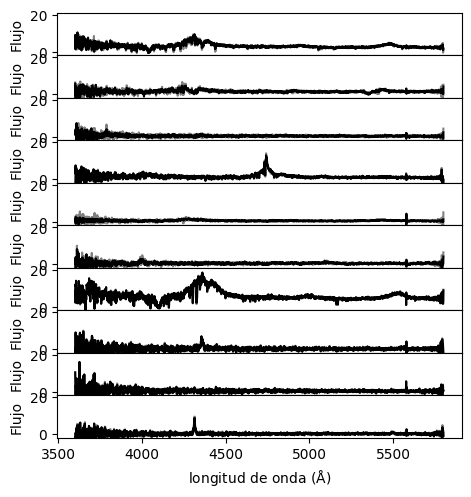

In [27]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Cargar los archivos FITS
spec_file = fits.open("/content/coadd-sv3-dark-9930.fits")
spec_file2 = fits.open("/content/coadd-sv3-dark-25971.fits")
spec_file3 = fits.open("/content/coadd-sv3-dark-25965.fits")
spec_file4 = fits.open("/content/coadd-sv3-dark-25956.fits")

# Acceder a los espectros y longitudes de onda de los archivos
bflux = spec_file["B_FLUX"].data
bflux2 = spec_file2["B_FLUX"].data
bflux3 = spec_file3["B_FLUX"].data
bflux4 = spec_file4["B_FLUX"].data
bwave = spec_file["B_WAVELENGTH"].data
bwave2 = spec_file2["B_WAVELENGTH"].data
bwave3 = spec_file3["B_WAVELENGTH"].data
bwave4 = spec_file4["B_WAVELENGTH"].data

# Combinar los datos de todos los archivos FITS en una sola matriz
all_bflux = np.vstack((bflux, bflux2, bflux3, bflux4))
all_bwave = bwave  # asumiendo que las longitudes de onda son las mismas en todos los archivos

# Calcular el espectro promedio
spec_mean = np.mean(all_bflux, axis=0)

# Centrar los datos
all_bflux_centered = all_bflux - spec_mean

# Calcular la matriz de covarianza
cov_matrix = np.cov(all_bflux_centered.T)

# Calcular los autovectores y autovalores
evals, evecs = np.linalg.eig(cov_matrix)

# Ordenar los autovectores y autovalores en orden descendente
idx = np.argsort(evals)[::-1]
evecs = evecs[:, idx]
evals = evals[idx]

# Graficar los primeros 10 componentes principales
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i in range(10):
  #DE INICIO OBSERVO QUE EL VALOR PARA n DEBE SER MUCHO MAYOR A LOS PASADOS PARA PODER REPRESENTAR
  #CORRECTAMENTE EL FLUJO.
    n = 70
    ax = fig.add_subplot(10, 1, i+1)
    ax.plot(all_bwave, all_bflux[i], '-', c='gray')
    ax.plot(all_bwave, (spec_mean + (all_bflux_centered[i:i+1] @ evecs[:, :n] @ evecs[:, :n].T)).flatten(), '-k')

    if i < 9:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('Flujo')

fig.axes[-1].set_xlabel(r'${\rm longitud\ de\ onda\ (\AA)}$')
plt.show()

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

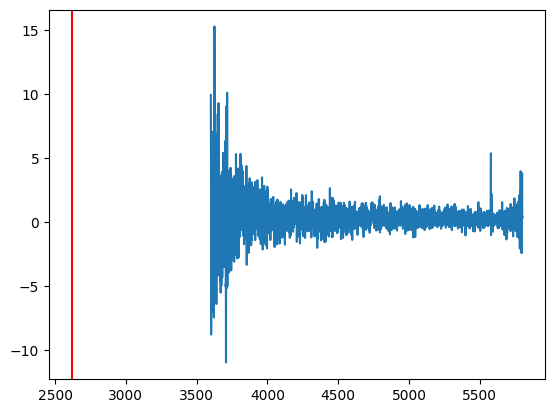

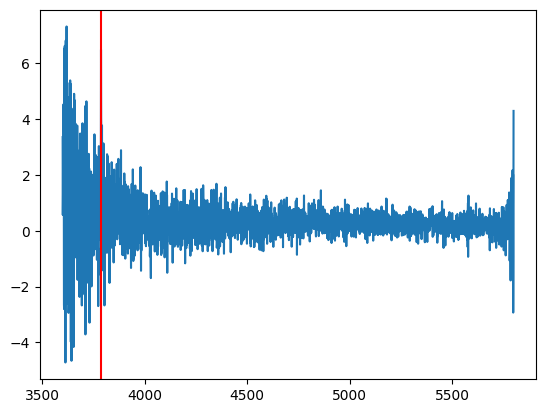

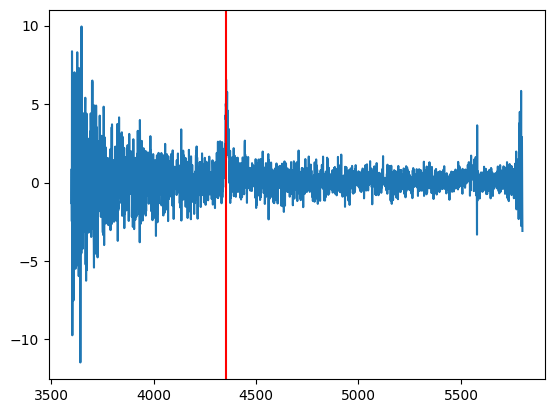

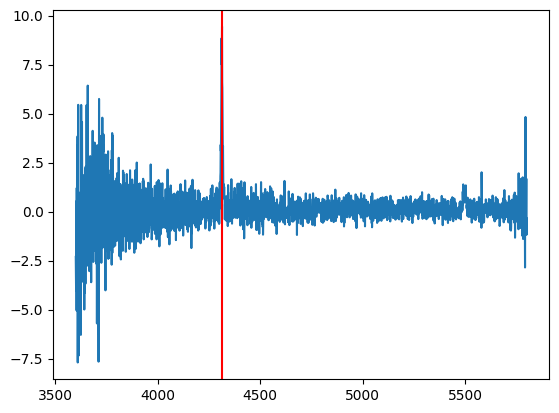

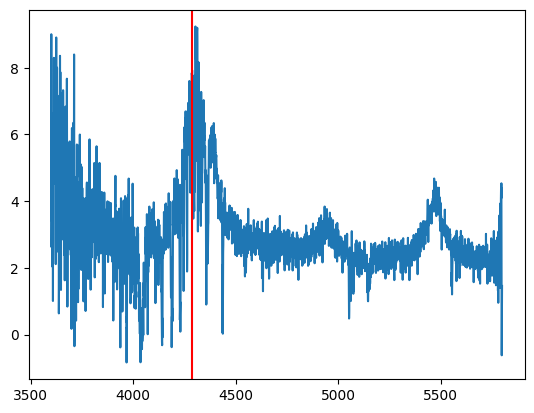

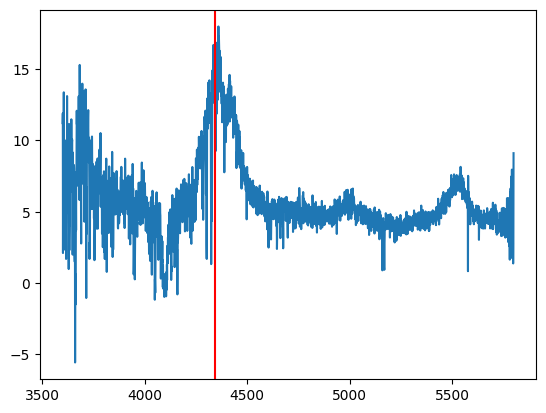

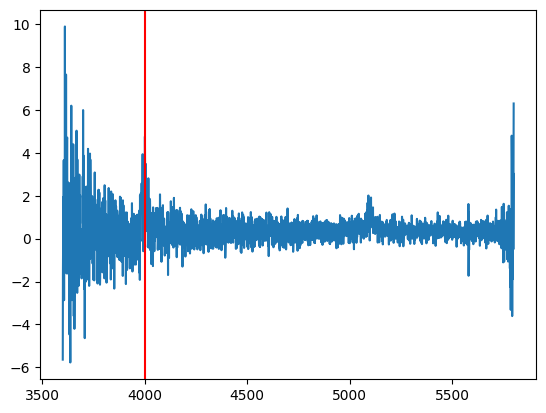

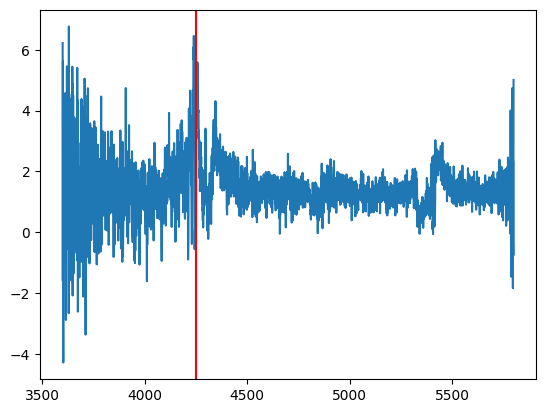

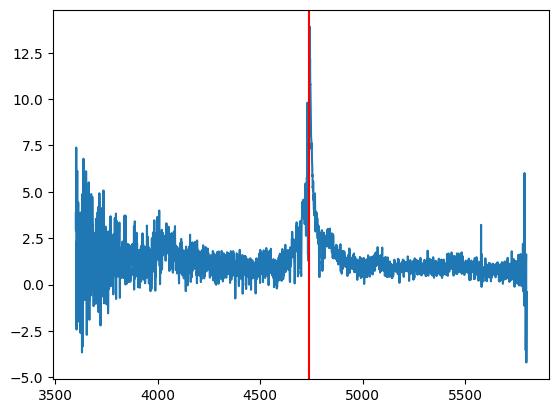

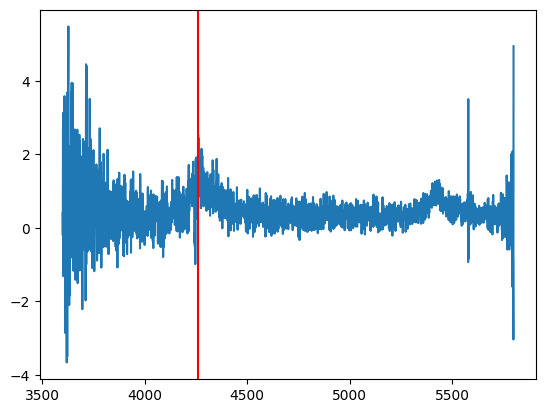

In [33]:

#From the zcat table, the most important thing we will use is the TARGETID, the SURVEY, the SPECTYPE and the redshift Z.
#Lets reduce the table to just these variables.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat
#Now lets reduce the table to contain only the elements for which the TARGETIDs that we identified in our spectra file are present
#For this we need to know that such files correspond to the SURVEY=sv3 (as indicated in the filename)
#So, lets make first a filter for sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat
#Now lets keep only the elements corresponding to the TARGETIDS we have in the spectrafile
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat
#As we can see we have now a table with only 49 elements, and most of the spectype is of the QSO kind.
#So now we now for a given TARGETID what is the corresponding redshift of the Quasar
# Now lets see if there is agrrement, by ploting the possition of the Lyman-alpha emission
# line for the first 10 elements in the catalog

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

In [34]:
#We can see in most of the cases the position of the redline, which is the expected position of the Lya emission line
#match very well with the position of a strong emission line in the data. So we are confident that we are matching correctly
#the spectra with the quasar redshift.

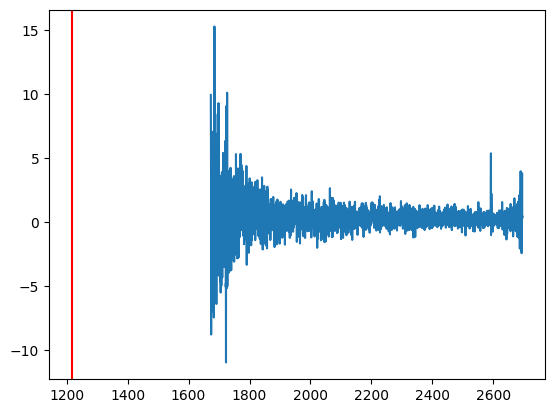

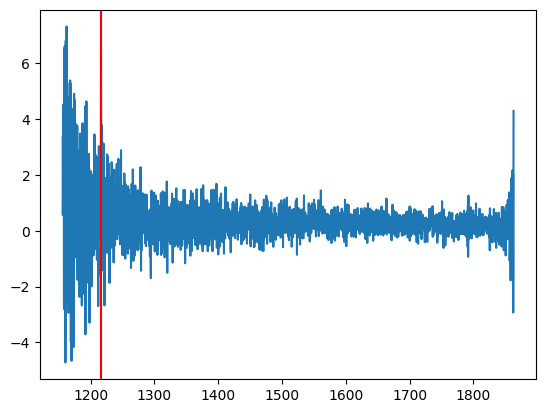

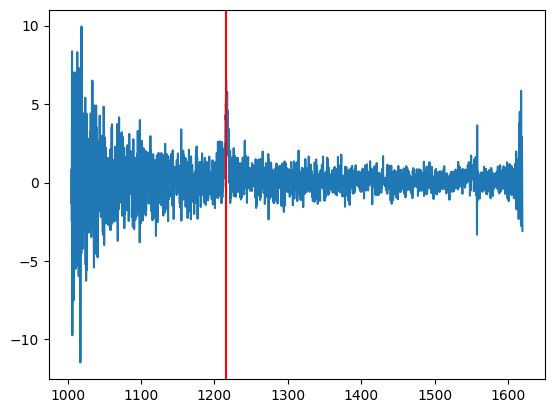

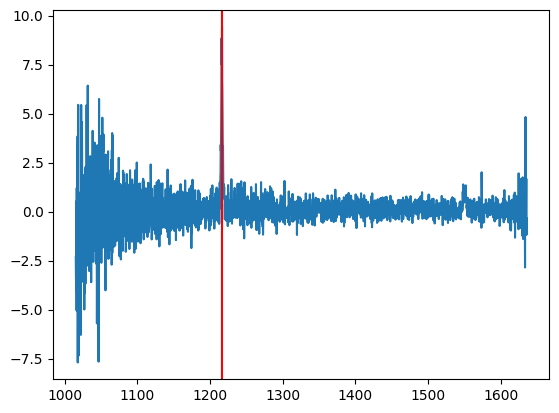

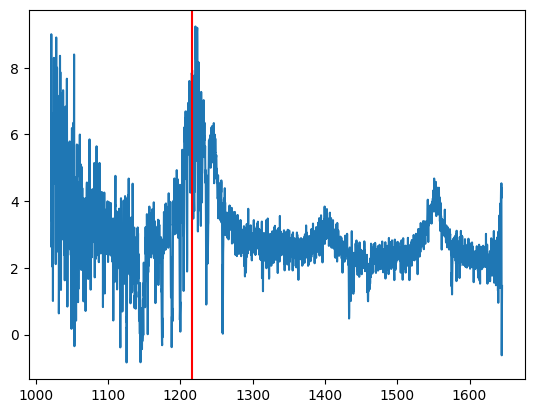

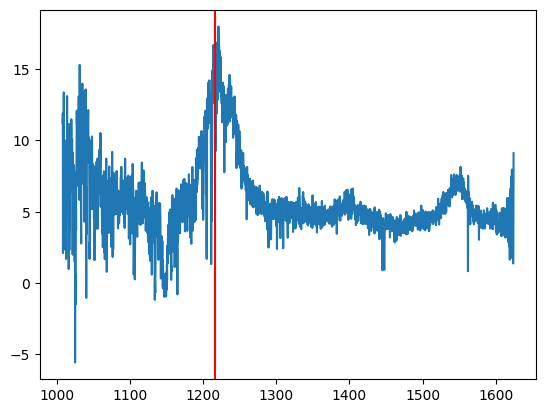

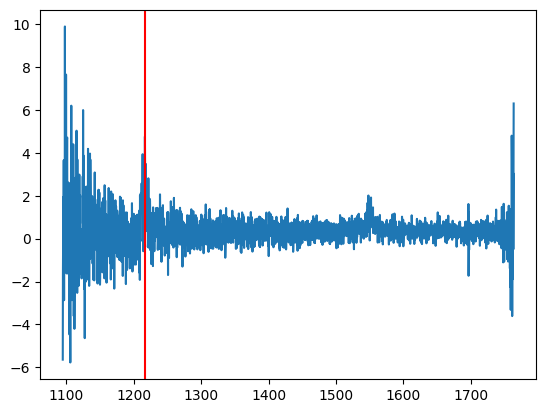

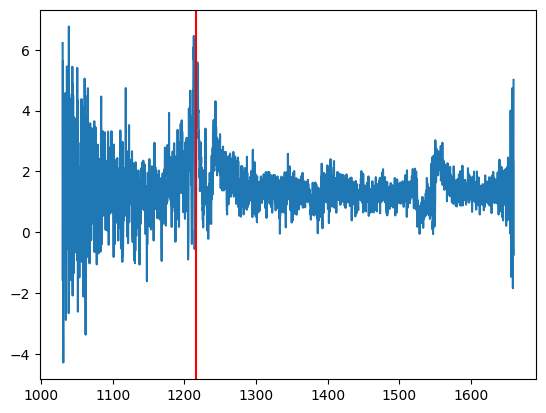

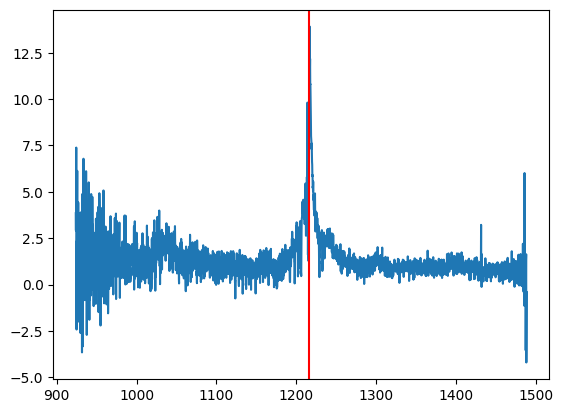

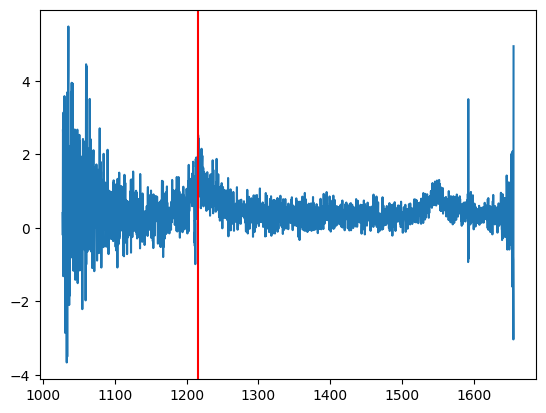

In [35]:
#No we can convert our spectra from the observed frame to restframe, to do so we need to convert the wavelentgh array
#for each of the spectra to the observed frame using the redhisft.
#Again, here is an example for the first ten spectra

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx])
  plt.axvline(1216,color='red')
  plt.show()

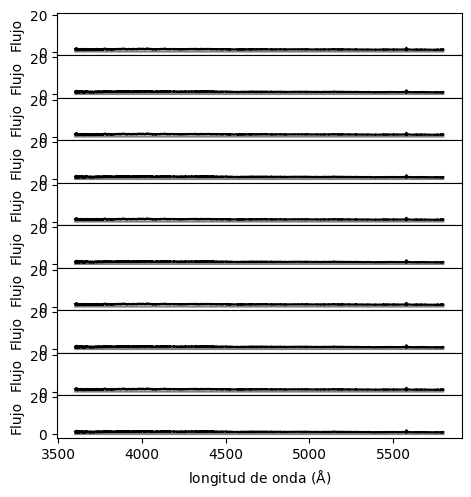

In [45]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Cargar los archivos FITS
spec_file = fits.open("/content/coadd-sv3-dark-9930.fits")
spec_file2 = fits.open("/content/coadd-sv3-dark-25971.fits")
spec_file3 = fits.open("/content/coadd-sv3-dark-25965.fits")
spec_file4 = fits.open("/content/coadd-sv3-dark-25956.fits")

# Acceder a los espectros y longitudes de onda de los archivos
bflux = spec_file["B_FLUX"].data
bflux2 = spec_file2["B_FLUX"].data
bflux3 = spec_file3["B_FLUX"].data
bflux4 = spec_file4["B_FLUX"].data
bwave = spec_file["B_WAVELENGTH"].data
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/zall-pix-edr-vac.fits",hdu=1)

# Combinar los datos de todos los archivos FITS en una sola matriz
all_bflux = np.vstack((bflux, bflux2, bflux3, bflux4))

# Calcular el espectro promedio
spec_mean = np.mean(all_bflux, axis=0)

# Centrar los datos
all_bflux_centered = all_bflux - spec_mean


# Reducir la tabla a solo las variables TARGETID, SURVEY, SPECTYPE y Z.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']

# Filtrar la tabla para contener solo los elementos para los cuales los TARGETIDs que identificamos en nuestro archivo de espectros están presentes.
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]

mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]

# Definir una cuadrícula de longitud de onda común en el marco de reposo
common_bwave_rest = np.linspace(bwave.min(), bwave.max(), len(bwave))

# Crear un contenedor para los espectros interpolados
all_bflux_interpolated = np.zeros((len(all_bflux), len(common_bwave_rest)))

for i in range(min(len(all_bflux), len(zcat["Z"]))):
    # Obtener el redshift del objeto
    z = zcat["Z"][i]

    # Convertir la longitud de onda al marco de reposo
    rest_bwave = bwave / (1 + z)

    # Crear una función de interpolación para el espectro
    interp_func = interp1d(rest_bwave, all_bflux_centered[i], bounds_error=False, fill_value=0)

    # Interpolar el espectro a la cuadrícula común en el marco de reposo
    all_bflux_interpolated[i] = interp_func(common_bwave_rest)

# Calcular la matriz de covarianza de los espectros interpolados
cov_matrix = np.cov(all_bflux_interpolated.T)

# Calcular los autovectores y autovalores
evals, evecs = np.linalg.eig(cov_matrix)

# Ordenar los autovectores y autovalores en orden descendente
idx = np.argsort(evals)[::-1]
evecs = evecs[:, idx]
evals = evals[idx]

# Graficar los primeros 10 componentes principales de los espectros interpolados
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i in range(10):
    n = 10  # Número de componentes principales a considerar
    ax = fig.add_subplot(10, 1, i+1)
    ax.plot(common_bwave_rest, all_bflux_interpolated[i], '-', c='gray')
    ax.plot(common_bwave_rest, (spec_mean + (all_bflux_interpolated[i:i+1] @ evecs[:, :n] @ evecs[:, :n].T)).flatten(), '-k')

    if i < 9:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('Flujo')

fig.axes[-1].set_xlabel(r'${\rm longitud\ de\ onda\ (\AA)}$')
plt.show()


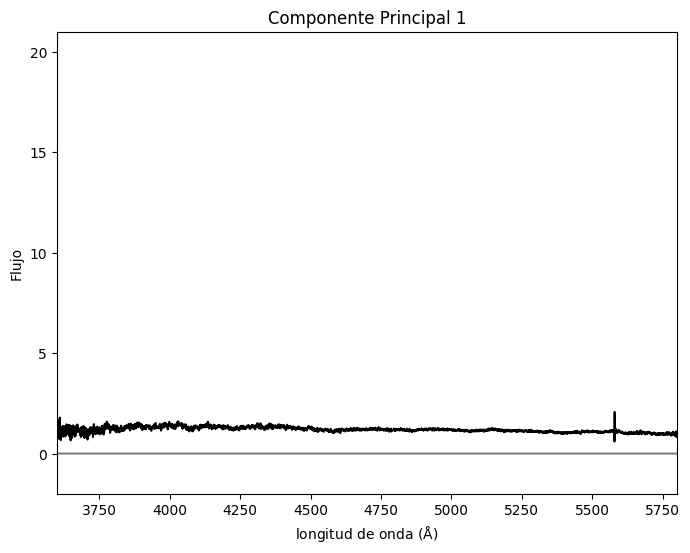

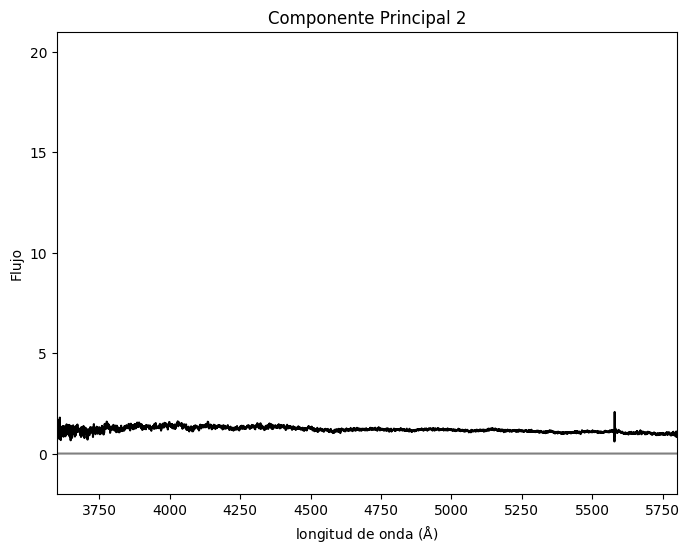

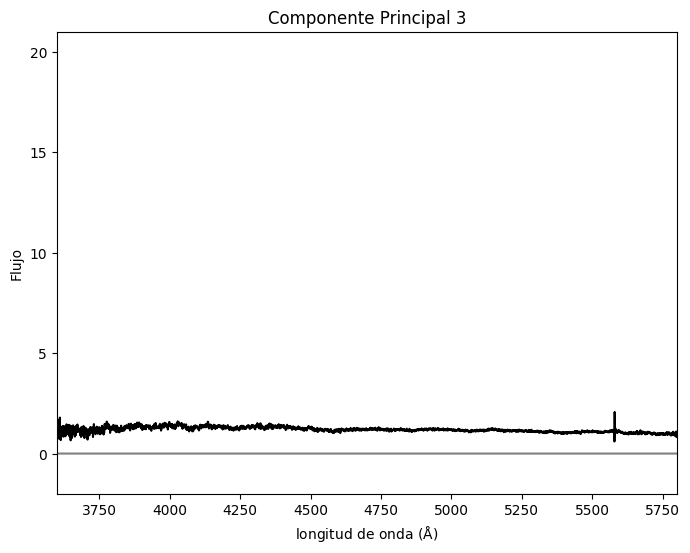

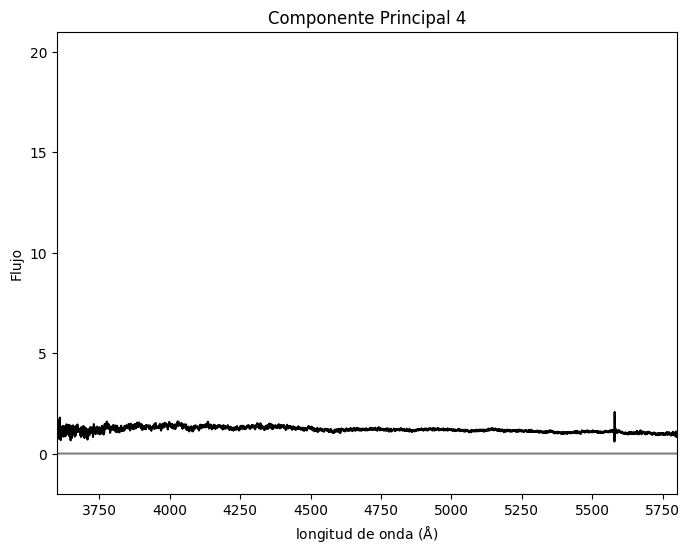

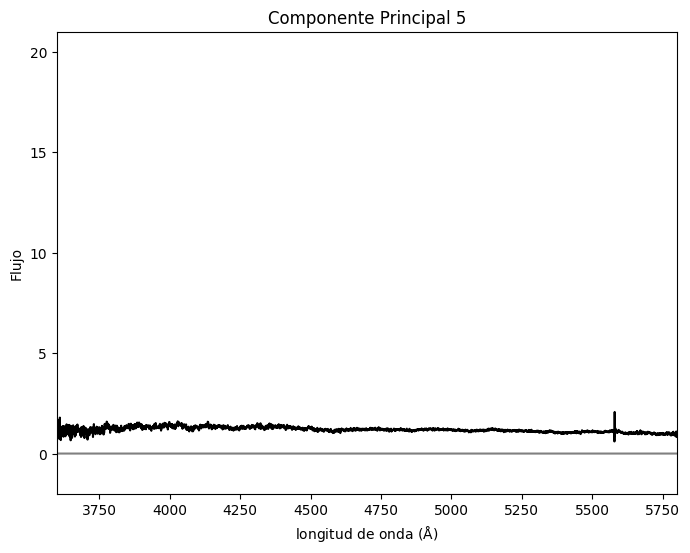

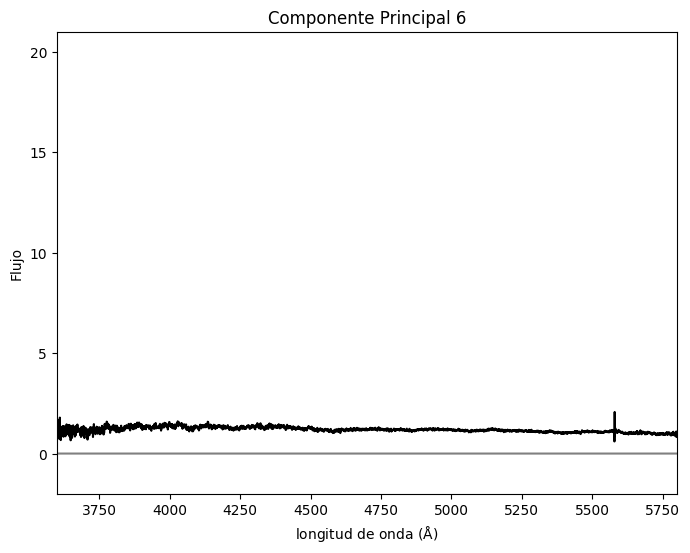

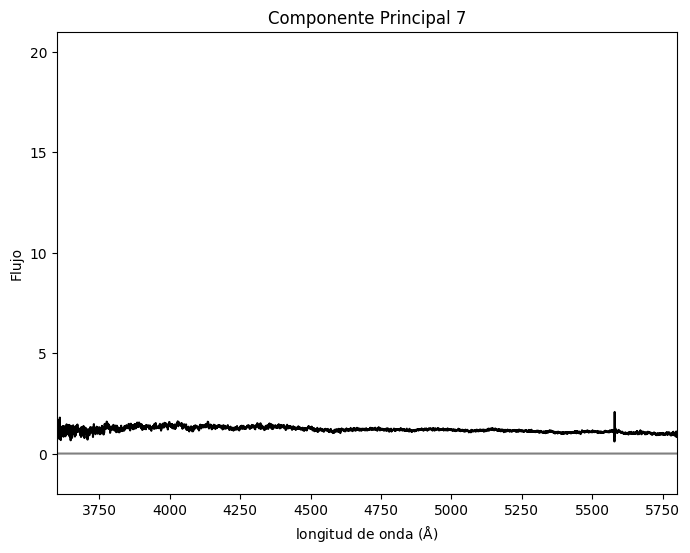

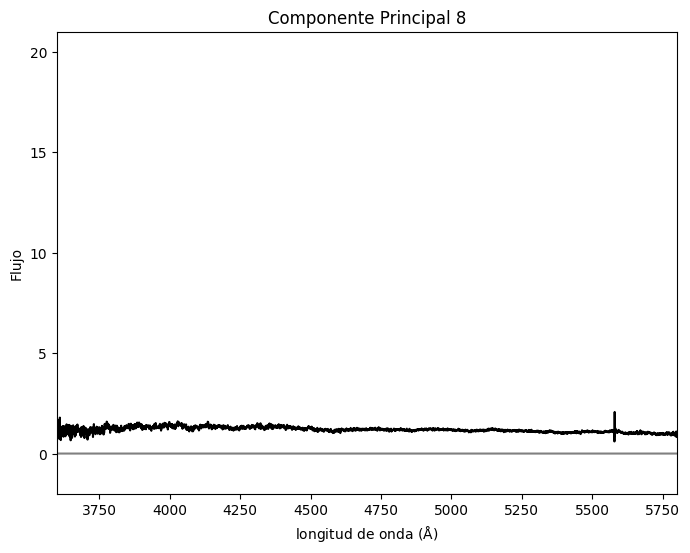

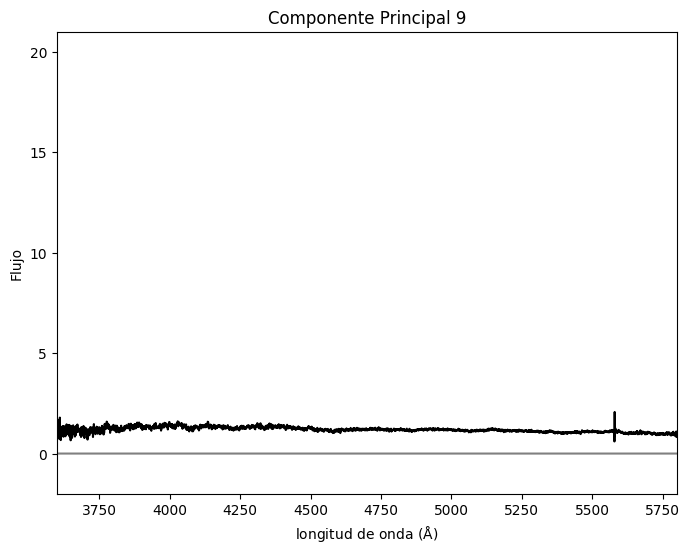

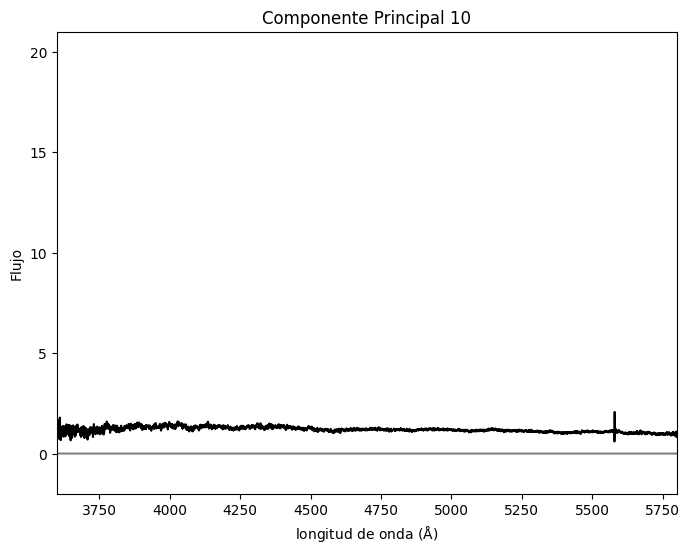

In [46]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Cargar los archivos FITS
spec_file = fits.open("/content/coadd-sv3-dark-9930.fits")
spec_file2 = fits.open("/content/coadd-sv3-dark-25971.fits")
spec_file3 = fits.open("/content/coadd-sv3-dark-25965.fits")
spec_file4 = fits.open("/content/coadd-sv3-dark-25956.fits")

# Acceder a los espectros y longitudes de onda de los archivos
bflux = spec_file["B_FLUX"].data
bflux2 = spec_file2["B_FLUX"].data
bflux3 = spec_file3["B_FLUX"].data
bflux4 = spec_file4["B_FLUX"].data
bwave = spec_file["B_WAVELENGTH"].data
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/zall-pix-edr-vac.fits",hdu=1)

# Combinar los datos de todos los archivos FITS en una sola matriz
all_bflux = np.vstack((bflux, bflux2, bflux3, bflux4))

# Calcular el espectro promedio
spec_mean = np.mean(all_bflux, axis=0)

# Centrar los datos
all_bflux_centered = all_bflux - spec_mean


# Reducir la tabla a solo las variables TARGETID, SURVEY, SPECTYPE y Z.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']

# Filtrar la tabla para contener solo los elementos para los cuales los TARGETIDs que identificamos en nuestro archivo de espectros están presentes.
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]

mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]

# Definir una cuadrícula de longitud de onda común en el marco de reposo
common_bwave_rest = np.linspace(bwave.min(), bwave.max(), len(bwave))

# Crear un contenedor para los espectros interpolados
all_bflux_interpolated = np.zeros((len(all_bflux), len(common_bwave_rest)))

for i in range(min(len(all_bflux), len(zcat["Z"]))):
    # Obtener el redshift del objeto
    z = zcat["Z"][i]

    # Convertir la longitud de onda al marco de reposo
    rest_bwave = bwave / (1 + z)

    # Crear una función de interpolación para el espectro
    interp_func = interp1d(rest_bwave, all_bflux_centered[i], bounds_error=False, fill_value=0)

    # Interpolar el espectro a la cuadrícula común en el marco de reposo
    all_bflux_interpolated[i] = interp_func(common_bwave_rest)

# Calcular la matriz de covarianza de los espectros interpolados
cov_matrix = np.cov(all_bflux_interpolated.T)

# Calcular los autovectores y autovalores
evals, evecs = np.linalg.eig(cov_matrix)

# Ordenar los autovectores y autovalores en orden descendente
idx = np.argsort(evals)[::-1]
evecs = evecs[:, idx]
evals = evals[idx]

# Graficar los primeros 10 componentes principales de los espectros interpolados de manera individual
for i in range(10):
    n = 10  # Número de componentes principales a considerar
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(common_bwave_rest, all_bflux_interpolated[i], '-', c='gray')
    ax.plot(common_bwave_rest, (spec_mean + (all_bflux_interpolated[i:i+1] @ evecs[:, :n] @ evecs[:, :n].T)).flatten(), '-k')

    ax.set_xlim(common_bwave_rest.min(), common_bwave_rest.max())
    ax.set_ylim(-2, 21)
    ax.set_xlabel(r'${\rm longitud\ de\ onda\ (\AA)}$')
    ax.set_ylabel('Flujo')
    plt.title(f'Componente Principal {i+1}')
    plt.show()
